<a href="https://colab.research.google.com/github/Srinithi1726/ML-MODEL-FOR-O2-RATE-SENSOR/blob/main/Oxygen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Proto/Oxygen.csv')


In [ ]:
print("Shape of Dataset:", df.shape)
print("First 3 Rows of the Dataset:\n", df.head(3))
print("Info:\n", df.info())
print("Description:\n", df.describe())

Shape of Dataset: (49999, 6)
First 3 Rows of the Dataset:
    age  gender  spo2     pr  c/nc  oxy_flow
0   25       1   NaN   68.0   0.0       NaN
1   59       0  99.0   94.0   1.0      11.0
2   22       1  99.0  110.0   NaN      57.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       49999 non-null  int64  
 1   gender    49999 non-null  int64  
 2   spo2      43483 non-null  float64
 3   pr        41937 non-null  float64
 4   c/nc      43359 non-null  float64
 5   oxy_flow  40649 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 2.3 MB
Info:
 None
Description:
                 age        gender          spo2            pr          c/nc  \
count  49999.000000  49999.000000  43483.000000  41937.000000  43359.000000   
mean      46.316646      0.373387     88.231240     92.481150      0.785235   
std       21.810853      0.48370

In [ ]:
df.drop(["gender", "c/nc"], axis=1, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
def classify_oxygen_level(spo2):
    if spo2 < 90:
        return "Low Oxygen Saturation"
    elif 90 <= spo2 <= 100:
        return "Normal Oxygen Level"
    else:
        return "High Oxygen Level"

df["oxygen_category"] = df["spo2"].apply(classify_oxygen_level)


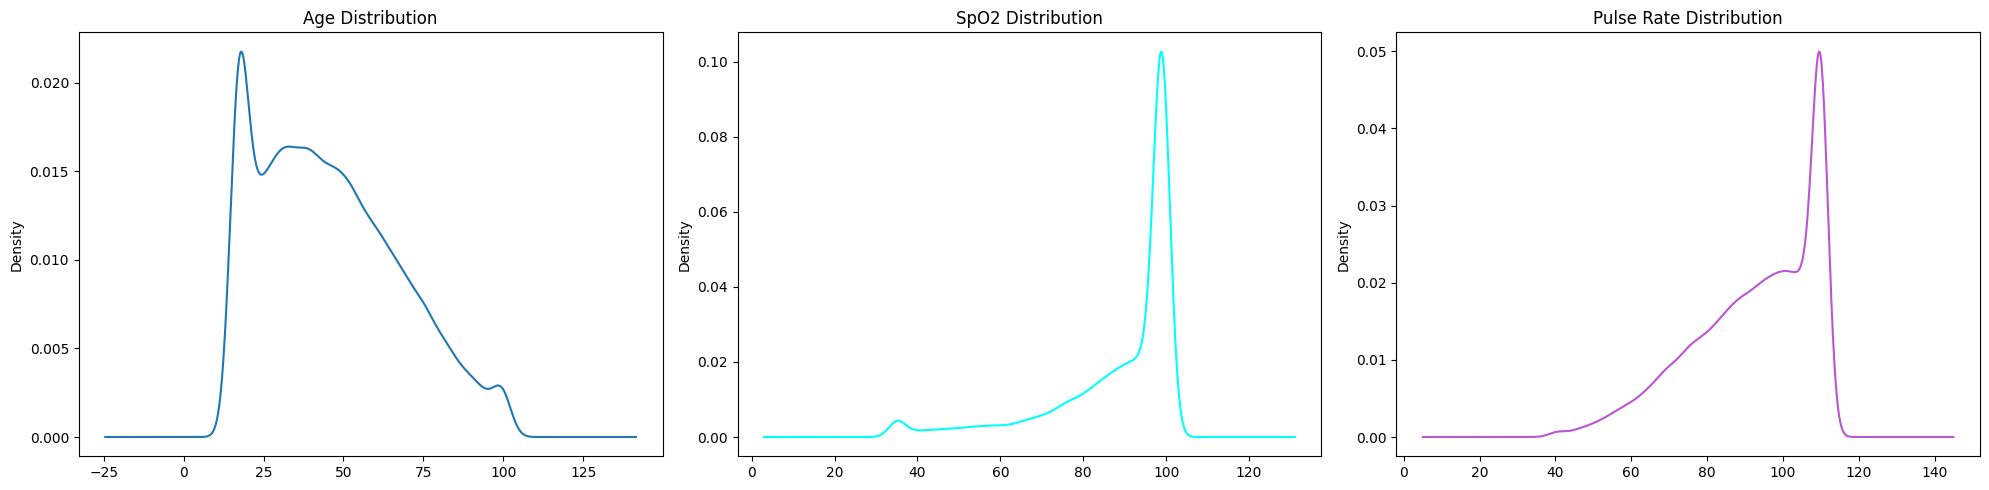

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
df.age.plot(kind="kde", ax=axes[0], title="Age Distribution")
df.spo2.plot(kind="kde", ax=axes[1], color="aqua", title="SpO2 Distribution")
df.pr.plot(kind="kde", ax=axes[2], color="mediumorchid", title="Pulse Rate Distribution")
plt.tight_layout()
plt.show()


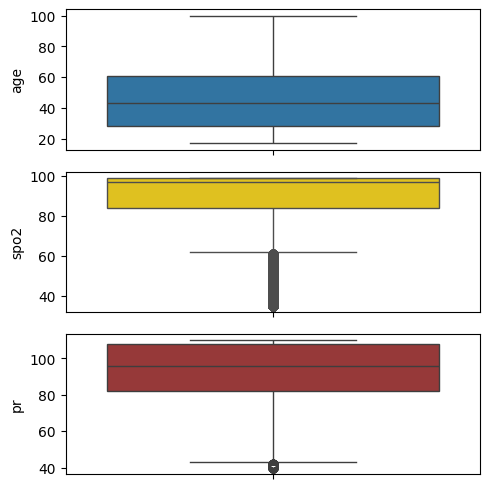

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(5, 5))
sns.boxplot(df["age"], ax=axes[0])
sns.boxplot(df["spo2"], ax=axes[1], color="gold")
sns.boxplot(df["pr"], ax=axes[2], color="brown")
plt.tight_layout()
plt.show()

In [ ]:
df["oxygen_category"] = df["oxygen_category"].astype('category').cat.codes

In [ ]:
# Splitting data into features and target
x = df.drop(["oxygen_category", "oxy_flow"], axis=1)  # Features
y = df["oxygen_category"]  # Target variable

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_train_pred = rf_classifier.predict(x_train_scaled)
y_test_pred = rf_classifier.predict(x_test_scaled)

In [ ]:
print("Random Forest Classifier Performance:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))

Random Forest Classifier Performance:
Training Accuracy: 1.0
Test Accuracy: 1.0

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2550
           1       1.00      1.00      1.00      4766

    accuracy                           1.00      7316
   macro avg       1.00      1.00      1.00      7316
weighted avg       1.00      1.00      1.00      7316



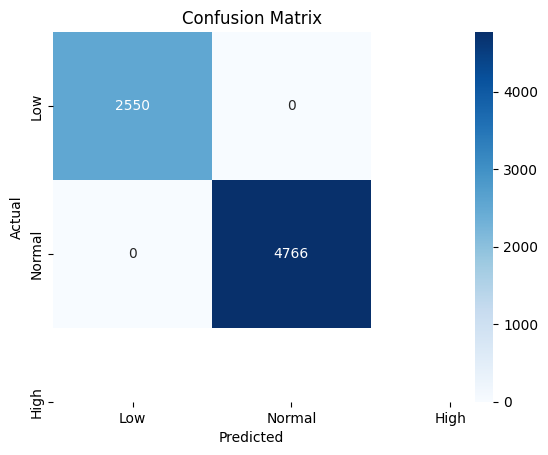

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Normal", "High"], yticklabels=["Low", "Normal", "High"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

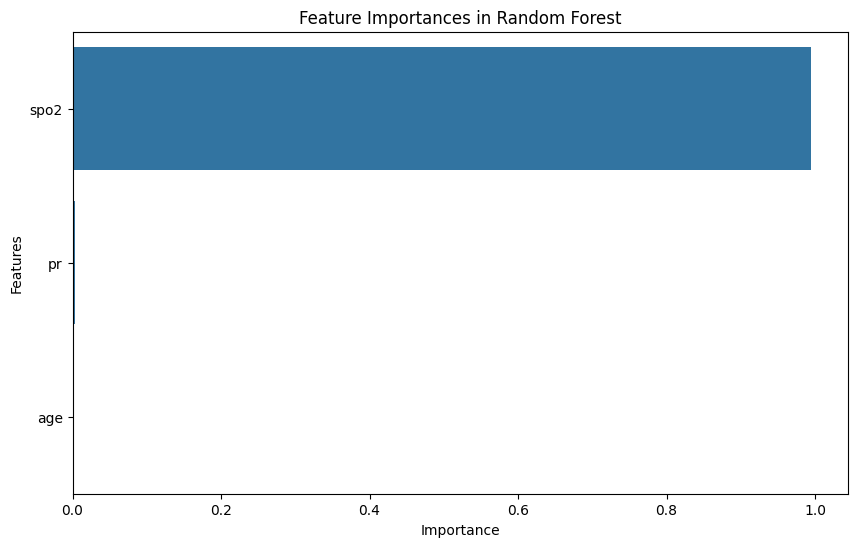

In [ ]:
feature_importances = pd.Series(rf_classifier.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()